In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('Datos_limpios_Mex.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   26582 non-null  int64  
 1   last_scraped                 26582 non-null  object 
 2   name                         26582 non-null  object 
 3   description                  26582 non-null  object 
 4   neighborhood_overview        26582 non-null  object 
 5   host_location                26582 non-null  object 
 6   host_response_time           26582 non-null  object 
 7   host_response_rate           26582 non-null  object 
 8   host_acceptance_rate         26582 non-null  object 
 9   host_is_superhost            26582 non-null  object 
 10  host_verifications           26582 non-null  object 
 11  host_has_profile_pic         26582 non-null  object 
 12  host_identity_verified       26582 non-null  object 
 13  neighbourhood   

In [6]:
dff=df
dff['room_type'] = dff['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})


In [7]:
df1 = dff[dff["room_type"] ==3]

In [8]:
import re
df1['price']= df1['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

C:\Users\lapep\AppData\Local\Temp\ipykernel_8768\2313346897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price']= df1['price'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)


In [9]:
df1=df1[df1['price'] <40000]

In [10]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y= df1['price']
X1= df1['room_type'].to_frame()

In [11]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [12]:
type(model)

sklearn.linear_model._base.LinearRegression

In [13]:
model.fit(X=X1, y=Y)

LinearRegression()

In [14]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(343.4811715481172)}

In [15]:
#Predicciones
y_pred= model.predict(X=X1)
y_pred

array([343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48117155,
       343.48117155, 343.48117155, 343.48117155, 343.48

<Axes: xlabel='room_type', ylabel='price'>

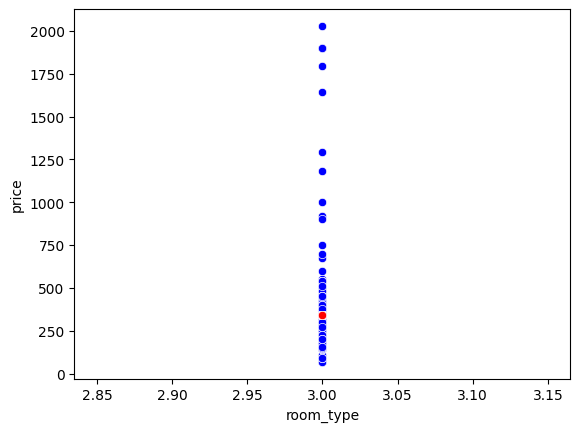

In [16]:
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y=y_pred, color="red", data=df1)

In [17]:
coef_Deter= model.score(X=X1, y=Y)
coef_Deter

0.0

In [18]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

In [19]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_acceptance_rate'] != 'Without information']
Y2= df1['price']
X2= df1['host_acceptance_rate'].to_frame()

In [20]:
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [21]:
X2 = X2.replace({'%': ''}, regex=True).astype(float)

In [22]:
model2.fit(X=X2, y=Y2)

LinearRegression()

In [23]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.60822215]),
 'rank_': 1,
 'singular_': array([377.28755556]),
 'intercept_': np.float64(206.48621455720885)}

In [24]:
#Limpiar valores
import re
df1['host_acceptance_rate']= df1['host_acceptance_rate'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [25]:
#Predicciones
y_pred2= model2.predict(X=X2)
y_pred2

array([343.18509718, 357.65909651, 362.48376296, 246.69176827,
       367.3084294 , 323.8864314 , 323.8864314 , 367.3084294 ,
       307.80420991, 314.23709851, 314.23709851, 365.70020726,
       365.70020726, 365.70020726, 365.70020726, 365.70020726,
       367.3084294 , 348.00976362, 365.70020726, 367.3084294 ,
       357.65909651, 365.70020726, 365.70020726, 365.70020726,
       365.70020726, 365.70020726, 206.48621456, 367.3084294 ,
       367.3084294 , 367.3084294 , 367.3084294 , 362.48376296,
       367.3084294 , 365.70020726, 365.70020726, 365.70020726,
       343.18509718, 254.73287901, 322.27820925, 254.73287901,
       254.73287901, 367.3084294 , 367.3084294 , 367.3084294 ,
       367.3084294 , 367.3084294 , 367.3084294 , 367.3084294 ,
       367.3084294 , 343.18509718, 254.73287901, 254.73287901,
       254.73287901, 254.73287901, 254.73287901, 254.73287901,
       365.70020726, 367.3084294 , 254.73287901, 254.73287901,
       343.18509718, 319.06176495, 254.73287901, 254.73

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

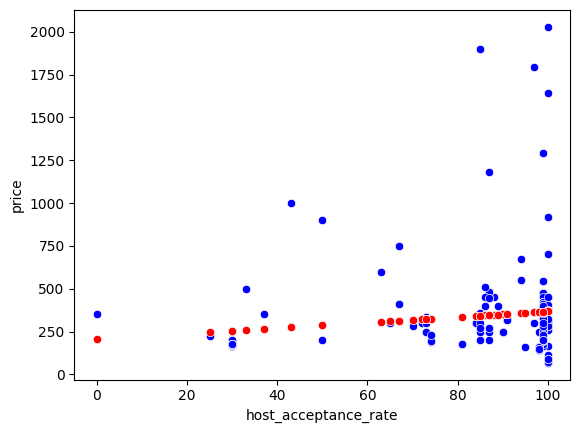

In [26]:
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y=y_pred2, color="red", data=df1)

In [27]:
coef_Deter2= model2.score(X=X2, y=Y2)
coef_Deter2

0.020372705585577355

In [28]:
coef_Correl2= np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.1427329870267464)

In [29]:
df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_8768\4038004741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})


In [30]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_is_superhost'] != 'Without information']
Y3= df1['price']
X3= df1['host_is_superhost'].to_frame()

In [31]:
from sklearn.linear_model import LinearRegression
model3= LinearRegression()
type(model3)

sklearn.linear_model._base.LinearRegression

In [32]:
model3.fit(X=X3, y=Y3)

LinearRegression()

In [33]:
#Predicciones
y_pred3= model3.predict(X=X3)
y_pred3

array([332.37735849, 332.37735849, 346.64516129, 346.64516129,
       346.64516129, 346.64516129, 346.64516129, 346.64516129,
       346.64516129, 346.64516129, 346.64516129, 346.64516129,
       346.64516129, 346.64516129, 346.64516129, 346.64516129,
       346.64516129, 346.64516129, 346.64516129, 346.64516129,
       346.64516129, 346.64516129, 346.64516129, 346.64516129,
       346.64516129, 346.64516129, 346.64516129, 346.64516129,
       346.64516129, 346.64516129, 346.64516129, 332.37735849,
       346.64516129, 346.64516129, 346.64516129, 346.64516129,
       346.64516129, 346.64516129, 346.64516129, 346.64516129,
       346.64516129, 332.37735849, 332.37735849, 332.37735849,
       332.37735849, 332.37735849, 332.37735849, 332.37735849,
       332.37735849, 346.64516129, 346.64516129, 346.64516129,
       346.64516129, 346.64516129, 346.64516129, 346.64516129,
       332.37735849, 346.64516129, 346.64516129, 346.64516129,
       346.64516129, 346.64516129, 346.64516129, 346.64

<Axes: xlabel='host_is_superhost', ylabel='price'>

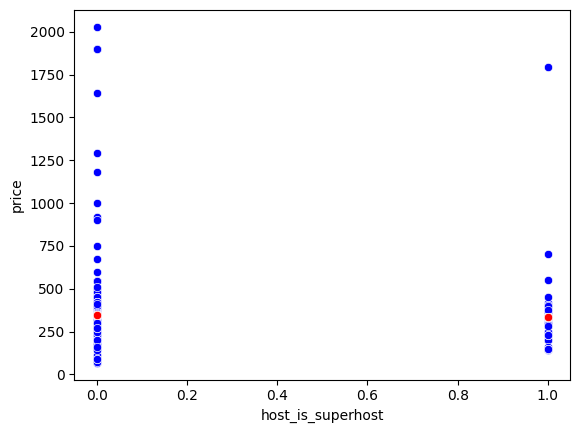

In [34]:
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y=y_pred3, color="red", data=df1)

In [35]:
coef_Deter3= model3.score(X=X3, y=Y3)
coef_Deter3

0.0004646401972361325

In [36]:
coef_Correl3= np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.021555514311566135)

In [37]:
df1['bathrooms']= df1['bathrooms'].round().astype(int)

In [38]:
#df1 = df1[df1['accommodates'] != 'Does not say']
#df1 = df1[df1['bathrooms'] != 'Without information']
Y4= df1['accommodates']
X4= df1['bathrooms'].to_frame()

In [39]:
from sklearn.linear_model import LinearRegression
model4= LinearRegression()
type(model4)

sklearn.linear_model._base.LinearRegression

In [40]:
model4.fit(X=X4, y=Y4)

LinearRegression()

In [41]:
#Predicciones
y_pred4= model4.predict(X=X4)
y_pred4

array([1.40691104, 2.02026949, 1.40691104, 1.40691104, 1.40691104,
       1.40691104, 1.40691104, 1.40691104, 1.40691104, 1.40691104,
       1.40691104, 1.71359026, 1.71359026, 1.40691104, 1.71359026,
       1.71359026, 1.40691104, 1.40691104, 1.71359026, 1.71359026,
       1.71359026, 1.71359026, 1.40691104, 1.71359026, 1.40691104,
       1.71359026, 1.40691104, 1.40691104, 1.40691104, 1.40691104,
       1.40691104, 1.71359026, 1.40691104, 1.40691104, 1.40691104,
       1.40691104, 1.10023182, 1.71359026, 1.40691104, 1.71359026,
       2.02026949, 1.40691104, 1.40691104, 1.40691104, 1.40691104,
       1.40691104, 1.40691104, 1.40691104, 1.40691104, 1.10023182,
       1.71359026, 1.40691104, 2.02026949, 1.40691104, 1.71359026,
       1.71359026, 1.40691104, 1.40691104, 2.02026949, 1.40691104,
       1.10023182, 1.40691104, 1.40691104, 1.40691104, 1.40691104,
       1.40691104, 1.71359026, 2.02026949, 2.02026949, 1.40691104,
       1.71359026, 1.71359026, 1.40691104, 1.40691104, 1.40691

<Axes: xlabel='bathrooms', ylabel='accommodates'>

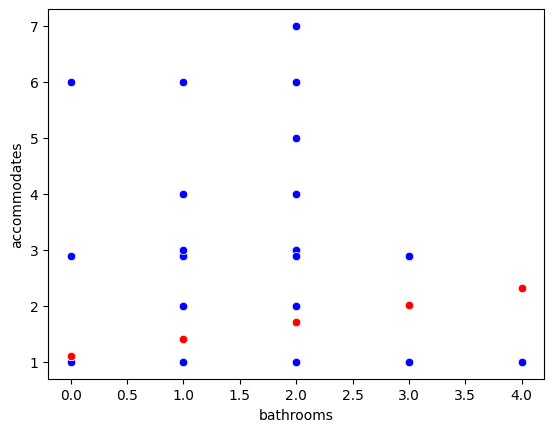

In [42]:
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y=y_pred4, color="red", data=df1)

In [43]:
coef_Deter4= model4.score(X=X4, y=Y4)
coef_Deter4

0.033391617949041885

In [44]:
coef_Correl4= np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.1827337351148985)

In [45]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['review_scores_cleanliness'] != 'Nothing']
Y5= df1['price']
X5= df1['review_scores_cleanliness'].to_frame()

In [46]:
from sklearn.linear_model import LinearRegression
model5= LinearRegression()
type(model5)

sklearn.linear_model._base.LinearRegression

In [47]:
model5.fit(X=X5, y=Y5)

LinearRegression()

In [48]:
#Limpiar valores
import re
df1['review_scores_cleanliness']= df1['review_scores_cleanliness'].apply(lambda x: float(re.sub(r'[^0-9.]', '', x)) if re.search(r'\d', x) else None)

In [49]:
#Predicciones
y_pred5= model5.predict(X=X5)
y_pred5

array([343.48498717, 343.46068304, 343.48128871, 343.48340212,
       343.46121139, 343.4675516 , 343.49238408, 343.45698458,
       343.46332479, 343.46332479, 343.47600521, 343.49766759,
       343.49185573, 343.48393047, 343.49661088, 343.5071779 ,
       343.52038667, 343.45698458, 343.48710057, 343.46649489,
       343.46913665, 343.48815727, 343.47442015, 343.47336345,
       343.46596654, 343.50876295, 343.50981965, 343.5071779 ,
       343.47864696, 343.49027068, 343.47442015, 343.50083769,
       343.48498717, 343.48815727, 343.46438149, 343.54733255,
       343.46068304, 343.45698458, 343.4717784 , 343.45698458,
       343.47019335, 343.47706191, 343.47336345, 343.47917531,
       343.4675516 , 343.47125005, 343.45698458, 343.48340212,
       343.46490984, 343.50981965, 343.49661088, 343.45698458,
       343.45698458, 343.47442015, 343.45698458, 343.47442015,
       343.47759026, 343.47759026, 343.48340212, 343.45698458,
       343.48340212, 343.48181706, 343.52302842, 343.45

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

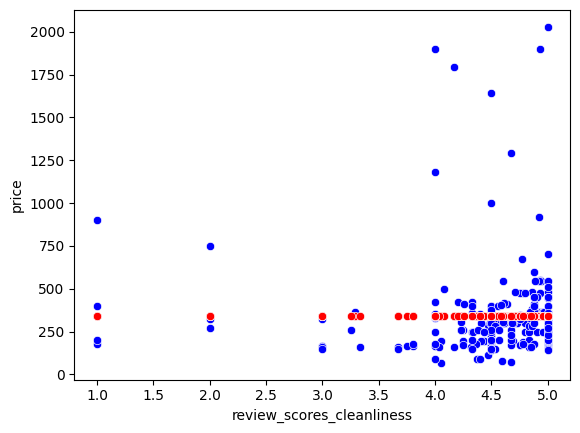

In [50]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y=y_pred5, color="red", data=df1)

In [51]:
coef_Deter5= model5.score(X=X5, y=Y5)
coef_Deter5

1.8053956774011226e-08

In [52]:
coef_Correl5= np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.00013436501320660533)

In [53]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_8768\3355181784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})


In [54]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['host_identity_verified'] != 'Nothing']
Y6= df1['price']
X6= df1['host_identity_verified'].to_frame()

In [55]:
from sklearn.linear_model import LinearRegression
model6= LinearRegression()
type(model6)

sklearn.linear_model._base.LinearRegression

In [56]:
model6.fit(X=X6, y=Y6)

LinearRegression()

In [57]:
#Predicciones
y_pred6= model6.predict(X=X6)
y_pred6

array([345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 321.36363636, 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.7235023 ,
       345.7235023 , 345.7235023 , 345.7235023 , 345.72

<Axes: xlabel='host_identity_verified', ylabel='price'>

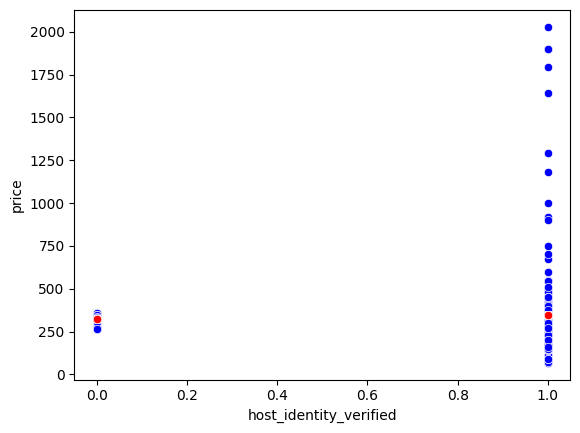

In [58]:
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1)
sns.scatterplot(x='host_identity_verified', y=y_pred6, color="red", data=df1)

In [59]:
coef_Deter6= model6.score(X=X6, y=Y6)
coef_Deter6

0.000655912596456032

In [60]:
coef_Correl6= np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.025610790625360084)

In [61]:
df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\lapep\AppData\Local\Temp\ipykernel_8768\1876949163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})


In [62]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['instant_bookable'] != 'Nothing']
Y7= df1['price']
X7= df1['instant_bookable'].to_frame()

In [63]:
from sklearn.linear_model import LinearRegression
model7= LinearRegression()
type(model7)

sklearn.linear_model._base.LinearRegression

In [64]:
model7.fit(X=X7, y=Y7)

LinearRegression()

In [65]:
#Predicciones
y_pred7= model7.predict(X=X7)
y_pred7

array([320.05813953, 356.64705882, 320.05813953, 356.64705882,
       356.64705882, 320.05813953, 320.05813953, 320.05813953,
       320.05813953, 320.05813953, 320.05813953, 356.64705882,
       356.64705882, 356.64705882, 356.64705882, 356.64705882,
       356.64705882, 320.05813953, 356.64705882, 356.64705882,
       356.64705882, 356.64705882, 356.64705882, 356.64705882,
       356.64705882, 356.64705882, 320.05813953, 356.64705882,
       356.64705882, 320.05813953, 356.64705882, 356.64705882,
       356.64705882, 356.64705882, 356.64705882, 356.64705882,
       356.64705882, 320.05813953, 356.64705882, 320.05813953,
       320.05813953, 356.64705882, 356.64705882, 356.64705882,
       356.64705882, 356.64705882, 356.64705882, 356.64705882,
       356.64705882, 356.64705882, 320.05813953, 320.05813953,
       320.05813953, 320.05813953, 320.05813953, 320.05813953,
       320.05813953, 356.64705882, 320.05813953, 320.05813953,
       356.64705882, 320.05813953, 320.05813953, 320.05

<Axes: xlabel='instant_bookable', ylabel='price'>

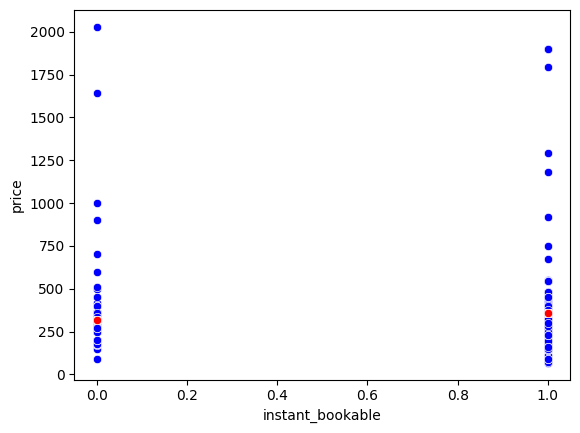

In [66]:
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y=y_pred7, color="red", data=df1)

In [67]:
coef_Deter7= model7.score(X=X7, y=Y7)
coef_Deter7

0.0040785220550452195

In [68]:
coef_Correl7= np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.0638633075799024)

In [69]:
df1['property_type'] = df1['property_type'].replace({
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Entire home': 3,
    'Entire loft': 4,
    'Houseboat': 5,
    'Entire townhouse': 6,
    'Entire serviced apartment': 7,
    'Boat': 8,
    'Entire guest suite': 9,
    'Entire guesthouse': 10,
    'Entire place': 11,
    'Entire villa': 12,
    'Room in aparthotel': 13,
    'Entire vacation home': 14,
    'Tiny home': 15,
    'Entire cabin': 16,
    'Casa particular': 17,
    'Entire cottage': 18,
    'Camper/RV': 19,
    'Barn': 20,
    'Entire chalet': 21,
    'Entire bungalow':22,
    'Earthen home':23,
    'Entire hostel':24,
    'Entire in-law':25,
    'Holiday park':26,
    'Campsite':27,
    'Castle':28,
    'Hut':29,
    'Entire home/apt':30,
    'Shipping container':31,
    'Dome':32,
    'Tent':33,
    'Tower':34,
    'Shared room in guesthouse':35,
    'Shared room in home':36,
    'Shared room in hostel':37,
    'Shared room in guest suite':38,
    'Shared room in rental unit':39,
    'Shared room in condo':40,
    'Shared room in hotel':41,
    'Shared room in tent':42,
    'Shared room in townhouse':43,
    'Shared room in boutique hotel':44,
    'Shared room in bed and breakfast':45,
    'Shared room in casa particular':46,
    'Shared room in serviced apartment':47,
    'Shared room in loft':48,
})

C:\Users\lapep\AppData\Local\Temp\ipykernel_8768\3440547071.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['property_type'] = df1['property_type'].replace({


In [70]:
df1 = df1[df1['price'] != 'Does not say']
df1 = df1[df1['property_type'] != 'Nothing']
Y8= df1['price']
X8= df1['property_type'].to_frame()

In [71]:
from sklearn.linear_model import LinearRegression
model8= LinearRegression()
type(model8)

sklearn.linear_model._base.LinearRegression

In [72]:
model8.fit(X=X8, y=Y8)

LinearRegression()

In [73]:
#Predicciones
y_pred8= model8.predict(X=X8)
y_pred8

array([307.53999425, 319.62148704, 331.70297983, 319.62148704,
       319.62148704, 343.78447262, 319.62148704, 355.86596541,
       355.86596541, 355.86596541, 355.86596541, 331.70297983,
       331.70297983, 331.70297983, 331.70297983, 331.70297983,
       355.86596541, 367.9474582 , 331.70297983, 355.86596541,
       319.62148704, 331.70297983, 331.70297983, 331.70297983,
       331.70297983, 331.70297983, 355.86596541, 355.86596541,
       355.86596541, 355.86596541, 355.86596541, 355.86596541,
       355.86596541, 380.02895099, 380.02895099, 380.02895099,
       331.70297983, 319.62148704, 319.62148704, 319.62148704,
       319.62148704, 331.70297983, 331.70297983, 331.70297983,
       331.70297983, 331.70297983, 331.70297983, 331.70297983,
       331.70297983, 331.70297983, 319.62148704, 319.62148704,
       319.62148704, 319.62148704, 319.62148704, 319.62148704,
       355.86596541, 331.70297983, 319.62148704, 319.62148704,
       331.70297983, 355.86596541, 319.62148704, 319.62

<Axes: xlabel='property_type', ylabel='price'>

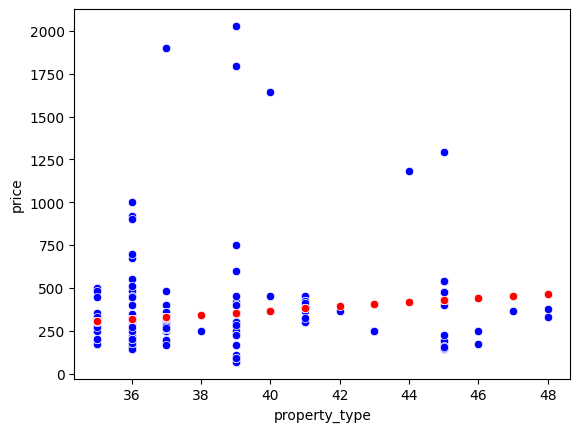

In [74]:
sns.scatterplot(x='property_type', y='price', color="blue", data=df1)
sns.scatterplot(x='property_type', y=y_pred8, color="red", data=df1)

In [75]:
coef_Deter8= model8.score(X=X8, y=Y8)
coef_Deter8

0.01810753350127481

In [76]:
coef_Correl8= np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.13456423559503025)

In [77]:
#Declaramos las variables dependientes e independientes para la regresión lineal 
Vars_Indep = df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
    'host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']]
Var_Dep = df1[['price']]

In [78]:
#Declaramos las variables dependientes e independientes para la regresión lineal accommodates vs bathrooms
Vars_Indep2= df1 [['bathrooms']]
Var_Dep2 = df1[['accommodates']]

In [79]:
from sklearn.linear_model import LinearRegression
model9 = LinearRegression()
model10= LinearRegression()
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [80]:
model9.fit(X=Vars_Indep, y=Var_Dep)
model10.fit(X=Vars_Indep2, y=Var_Dep2)

LinearRegression()

In [81]:
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'review_scores_cleanliness', 'host_acceptance_rate',
        'host_identity_verified', 'host_is_superhost', 'instant_bookable',
        'property_type'], dtype=object),
 'n_features_in_': 7,
 'coef_': array([[  0.        ,  -2.28127812,   1.98868336,  40.22604644,
         -49.22519817, -26.81623482,   9.08777767]]),
 'rank_': 6,
 'singular_': array([377.46310105,  46.21014282,  10.80691728,   6.51436945,
          5.56763563,   4.11140392,   0.        ]),
 'intercept_': array([-169.10867991])}

In [82]:
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([[0.30667922]]),
 'rank_': 1,
 'singular_': array([10.74777393]),
 'intercept_': array([1.10023182])}

In [83]:
y_pred= model9.predict(X=df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
y_pred

array([[298.80515882],
       [297.92546393],
       [389.91042312],
       [210.9124602 ],
       [359.10557502],
       [350.67666796],
       [333.57331334],
       [413.0026406 ],
       [339.69510983],
       [347.64984325],
       [348.19735   ],
       [367.77875123],
       [367.52781064],
       [367.18561892],
       [367.73312567],
       [368.18938129],
       [388.92393952],
       [398.22621801],
       [367.32249561],
       [386.59703584],
       [347.51566661],
       [367.36812117],
       [366.77498886],
       [366.7293633 ],
       [366.40998436],
       [368.25781964],
       [176.18953677],
       [388.35361999],
       [387.12172981],
       [414.43984581],
       [386.93922756],
       [332.88861838],
       [387.39548318],
       [403.71923185],
       [402.6926567 ],
       [406.27426334],
       [338.34028958],
       [246.53147273],
       [303.8786967 ],
       [246.53147273],
       [247.10179226],
       [319.65253795],
       [319.49284848],
       [319

In [84]:
# Lista de columnas a conservar
columnas_a_conservar = [
    "price", "room_type", "review_scores_cleanliness", "host_acceptance_rate",
    "host_identity_verified", "host_is_superhost", "instant_bookable",
    "accommodates", "bathrooms", "property_type"
]

# Filtrar el DataFrame para conservar solo esas columnas
df1= df1[columnas_a_conservar]

In [85]:
#insertamos la columna de predicciones en el DataFrame 
df1.insert(0, 'Predicciones', y_pred)
df1

,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
366,298.805159,290.0,3,4.47,85.0,1,1,0,2.9,1,35
456,297.925464,550.0,3,4.93,94.0,1,1,1,2.9,3,36
537,389.910423,300.0,3,4.54,97.0,1,0,0,2.9,1,37
1095,210.912460,222.0,3,4.50,25.0,1,0,1,2.0,1,36
1202,359.105575,918.0,3,4.92,100.0,1,0,1,4.0,1,36
...,...,...,...,...,...,...,...,...,...,...,...
25406,419.891846,375.0,3,4.50,100.0,1,1,1,1.0,1,48
25550,385.279081,200.0,3,4.33,99.0,1,0,0,1.0,2,36
25551,392.875737,200.0,3,1.00,99.0,1,0,0,1.0,2,36
25775,431.111847,158.0,3,4.85,95.0,1,0,1,3.0,2,45


In [86]:
y_pred2= model10.predict(X=df1[['bathrooms']])
y_pred2

array([[1.40691104],
       [2.02026949],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.71359026],
       [1.71359026],
       [1.40691104],
       [1.71359026],
       [1.71359026],
       [1.40691104],
       [1.40691104],
       [1.71359026],
       [1.71359026],
       [1.71359026],
       [1.71359026],
       [1.40691104],
       [1.71359026],
       [1.40691104],
       [1.71359026],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.71359026],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.10023182],
       [1.71359026],
       [1.40691104],
       [1.71359026],
       [2.02026949],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.40691104],
       [1.406

In [87]:
df1.insert(1, 'Predicciones2', y_pred2)
df1

,Predicciones,Predicciones2,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
366,298.805159,1.406911,290.0,3,4.47,85.0,1,1,0,2.9,1,35
456,297.925464,2.020269,550.0,3,4.93,94.0,1,1,1,2.9,3,36
537,389.910423,1.406911,300.0,3,4.54,97.0,1,0,0,2.9,1,37
1095,210.912460,1.406911,222.0,3,4.50,25.0,1,0,1,2.0,1,36
1202,359.105575,1.406911,918.0,3,4.92,100.0,1,0,1,4.0,1,36
...,...,...,...,...,...,...,...,...,...,...,...,...
25406,419.891846,1.406911,375.0,3,4.50,100.0,1,1,1,1.0,1,48
25550,385.279081,1.713590,200.0,3,4.33,99.0,1,0,0,1.0,2,36
25551,392.875737,1.713590,200.0,3,1.00,99.0,1,0,0,1.0,2,36
25775,431.111847,1.713590,158.0,3,4.85,95.0,1,0,1,3.0,2,45


In [88]:
coef_Deter9= model9.score(X=Vars_Indep, y=Var_Dep)
coef_Deter9

0.03851071477054058

In [89]:
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.1962414705676162)

In [90]:
coef_Deter10= model10.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter10

0.033391617949041885

In [91]:
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.1827337351148985)

In [92]:
df1['predicted_price'] = model9.predict(df1[['room_type', 'review_scores_cleanliness', 'host_acceptance_rate','host_identity_verified', 'host_is_superhost', 'instant_bookable', 'property_type']])
df1['predicted_accommodates'] = model10.predict(df1[['bathrooms']])

In [93]:
df1= df1.drop(['room_type'], axis=1)

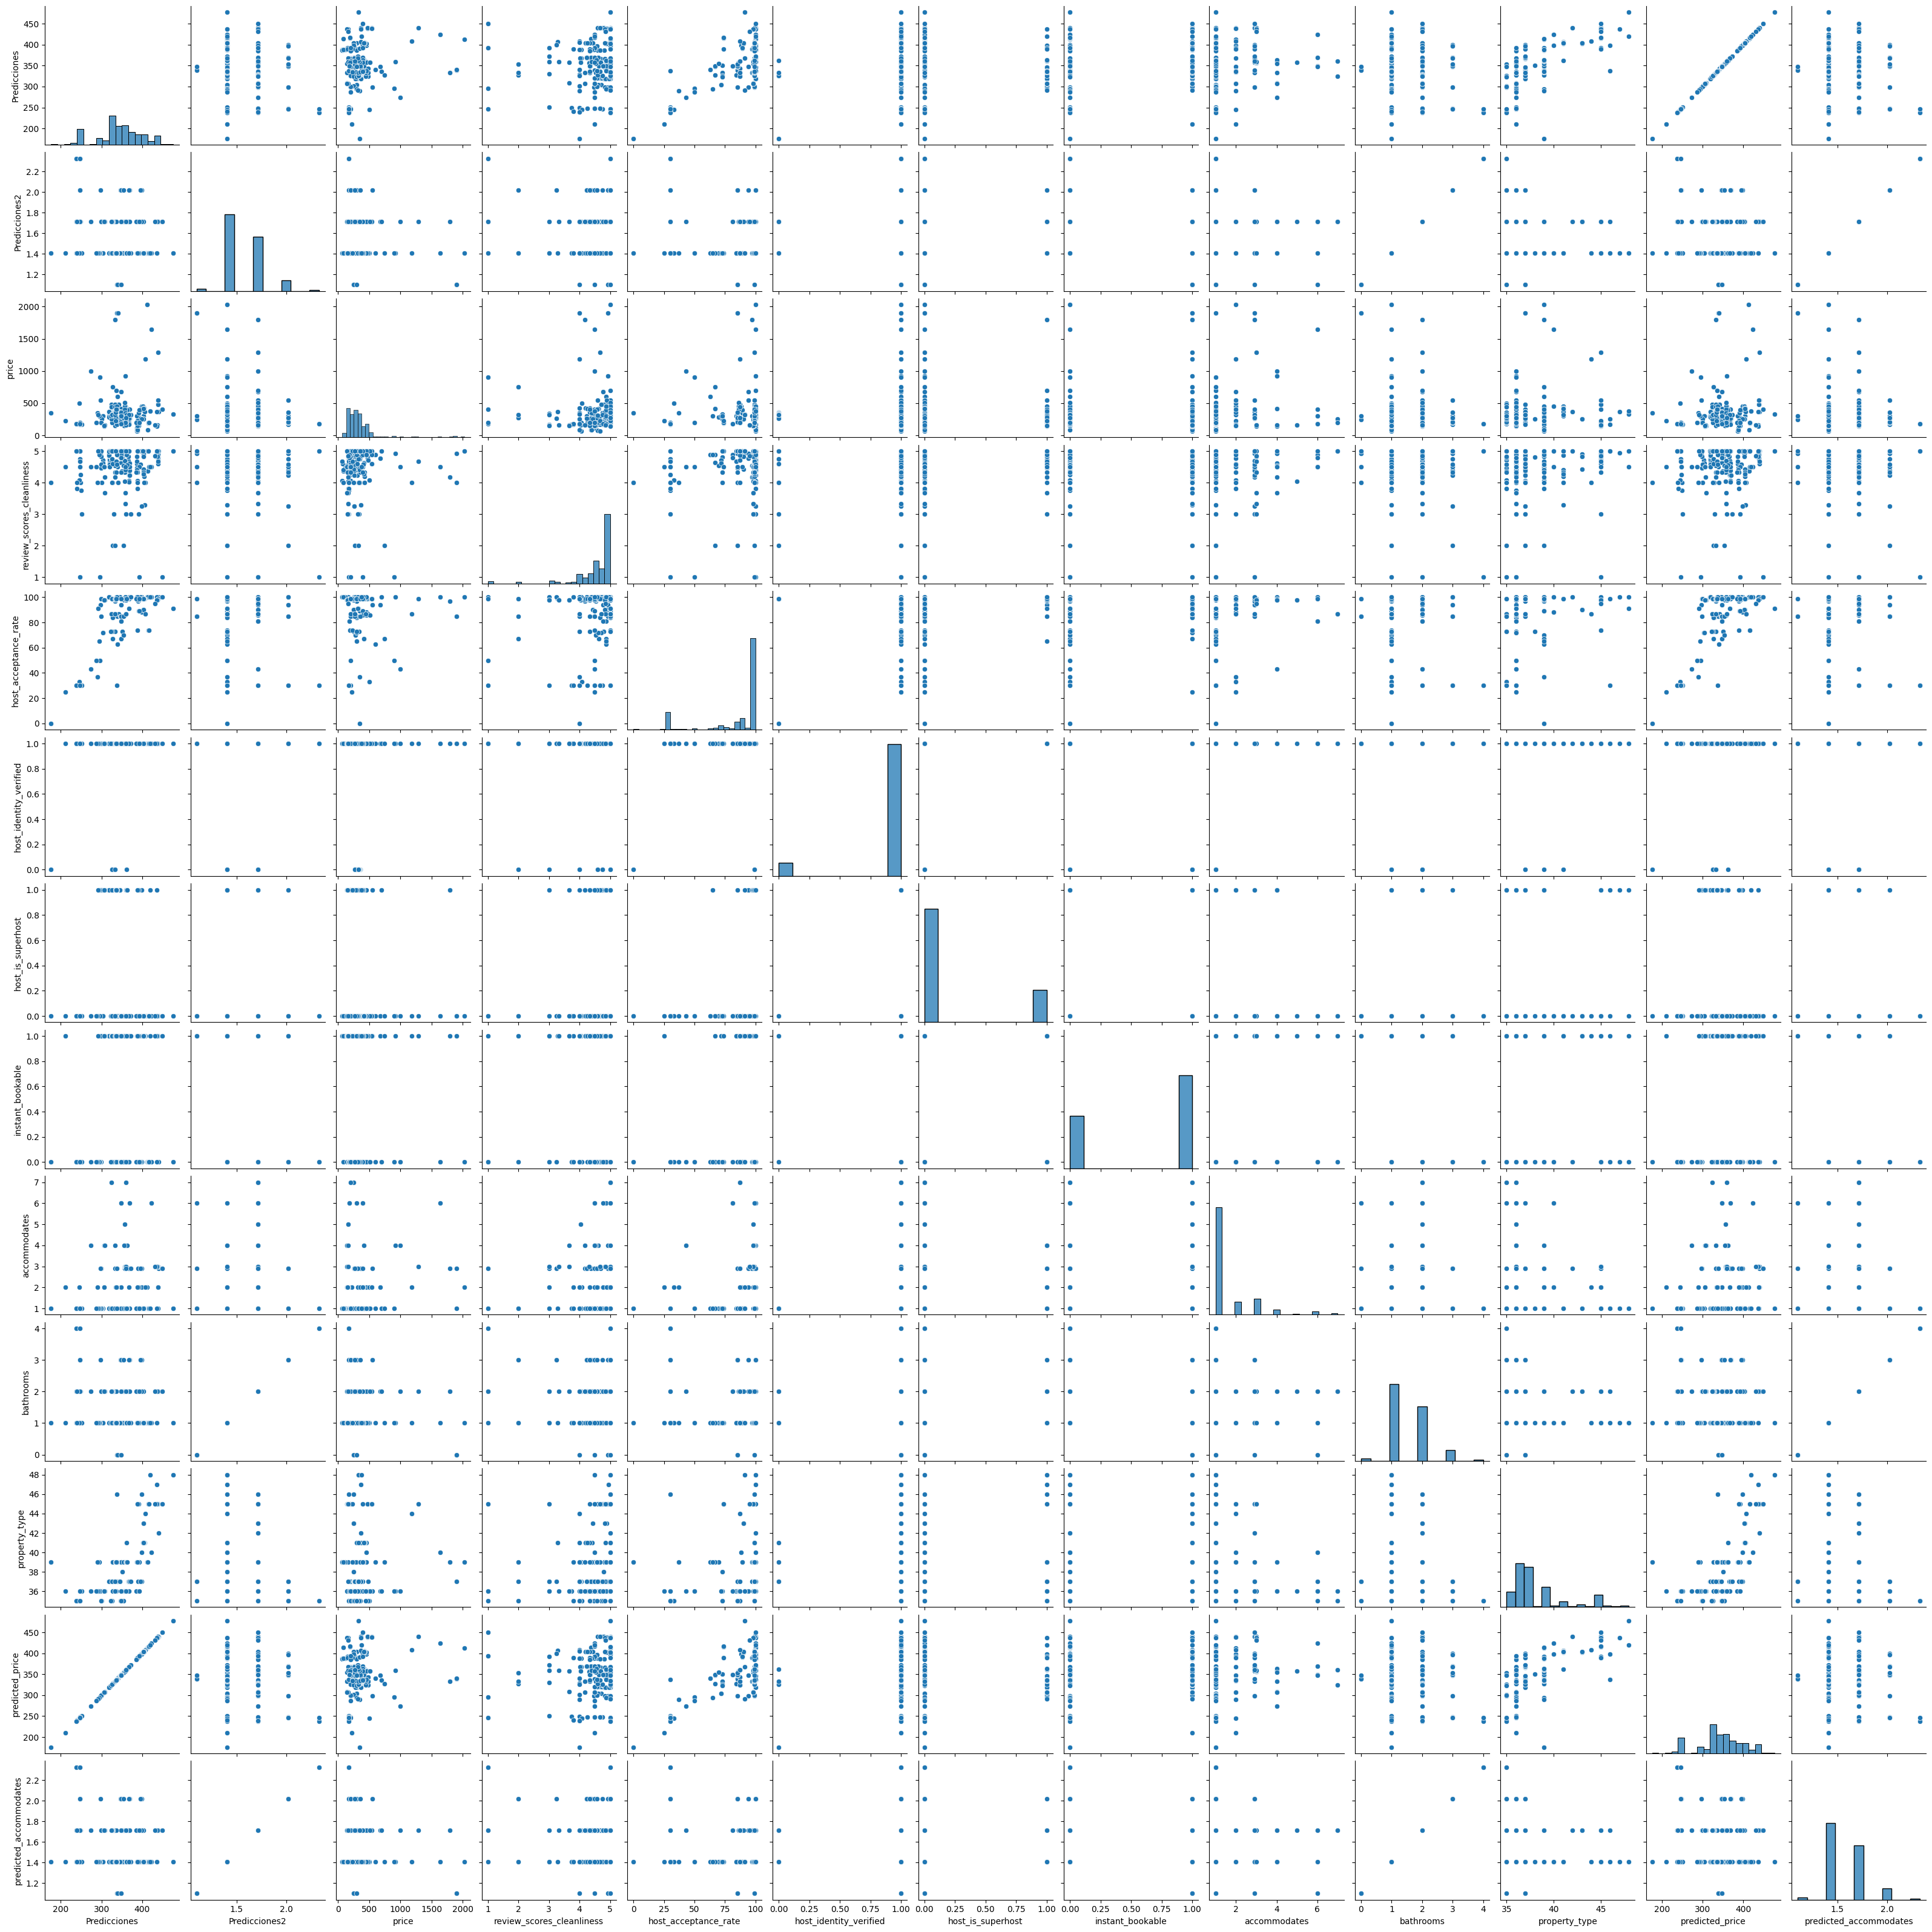

In [94]:
sns.pairplot(df1)

In [95]:
Corr_Factors9= df1.corr()
Corr_Factors9

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,-0.032416,0.196241,-0.000685,0.727333,0.130507,-0.109842,0.325432,0.160257,-0.032416,0.685707,1.000000,-0.032416
Predicciones2,-0.032416,1.000000,-0.180571,-0.100537,-0.078022,0.118462,-0.190698,-0.066476,0.182734,1.000000,-0.152906,-0.032416,1.000000
price,0.196241,-0.180571,1.000000,-0.000134,0.142733,0.025611,-0.021556,0.063863,0.140445,-0.180571,0.134564,0.196241,-0.180571
review_scores_cleanliness,-0.000685,-0.100537,-0.000134,1.000000,0.073447,-0.044937,0.113818,0.022199,-0.050174,-0.100537,0.040583,-0.000685,-0.100537
host_acceptance_rate,0.727333,-0.078022,0.142733,0.073447,1.000000,-0.121544,0.282385,0.622569,0.154659,-0.078022,0.216756,0.727333,-0.078022
host_identity_verified,0.130507,0.118462,0.025611,-0.044937,-0.121544,1.000000,0.169966,-0.208563,0.155516,0.118462,0.072999,0.130507,0.118462
host_is_superhost,-0.109842,-0.190698,-0.021556,0.113818,0.282385,0.169966,1.000000,0.085433,-0.021609,-0.190698,0.004376,-0.109842,-0.190698
instant_bookable,0.325432,-0.066476,0.063863,0.022199,0.622569,-0.208563,0.085433,1.000000,0.019495,-0.066476,0.158948,0.325432,-0.066476
accommodates,0.160257,0.182734,0.140445,-0.050174,0.154659,0.155516,-0.021609,0.019495,1.000000,0.182734,-0.033699,0.160257,0.182734
bathrooms,-0.032416,1.000000,-0.180571,-0.100537,-0.078022,0.118462,-0.190698,-0.066476,0.182734,1.000000,-0.152906,-0.032416,1.000000


In [96]:
Corr_Factors10= abs(Corr_Factors9)
Corr_Factors10

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,0.032416,0.196241,0.000685,0.727333,0.130507,0.109842,0.325432,0.160257,0.032416,0.685707,1.000000,0.032416
Predicciones2,0.032416,1.000000,0.180571,0.100537,0.078022,0.118462,0.190698,0.066476,0.182734,1.000000,0.152906,0.032416,1.000000
price,0.196241,0.180571,1.000000,0.000134,0.142733,0.025611,0.021556,0.063863,0.140445,0.180571,0.134564,0.196241,0.180571
review_scores_cleanliness,0.000685,0.100537,0.000134,1.000000,0.073447,0.044937,0.113818,0.022199,0.050174,0.100537,0.040583,0.000685,0.100537
host_acceptance_rate,0.727333,0.078022,0.142733,0.073447,1.000000,0.121544,0.282385,0.622569,0.154659,0.078022,0.216756,0.727333,0.078022
host_identity_verified,0.130507,0.118462,0.025611,0.044937,0.121544,1.000000,0.169966,0.208563,0.155516,0.118462,0.072999,0.130507,0.118462
host_is_superhost,0.109842,0.190698,0.021556,0.113818,0.282385,0.169966,1.000000,0.085433,0.021609,0.190698,0.004376,0.109842,0.190698
instant_bookable,0.325432,0.066476,0.063863,0.022199,0.622569,0.208563,0.085433,1.000000,0.019495,0.066476,0.158948,0.325432,0.066476
accommodates,0.160257,0.182734,0.140445,0.050174,0.154659,0.155516,0.021609,0.019495,1.000000,0.182734,0.033699,0.160257,0.182734
bathrooms,0.032416,1.000000,0.180571,0.100537,0.078022,0.118462,0.190698,0.066476,0.182734,1.000000,0.152906,0.032416,1.000000


<Axes: >

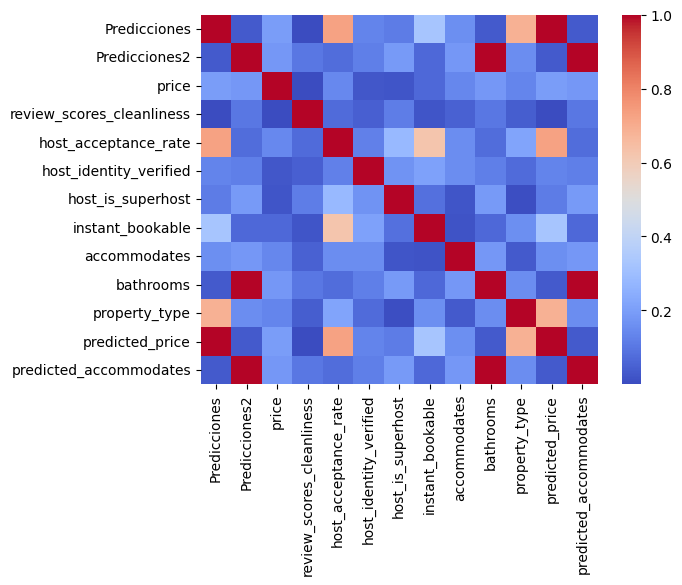

In [97]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'coolwarm')
Heart_Nap

<Axes: >

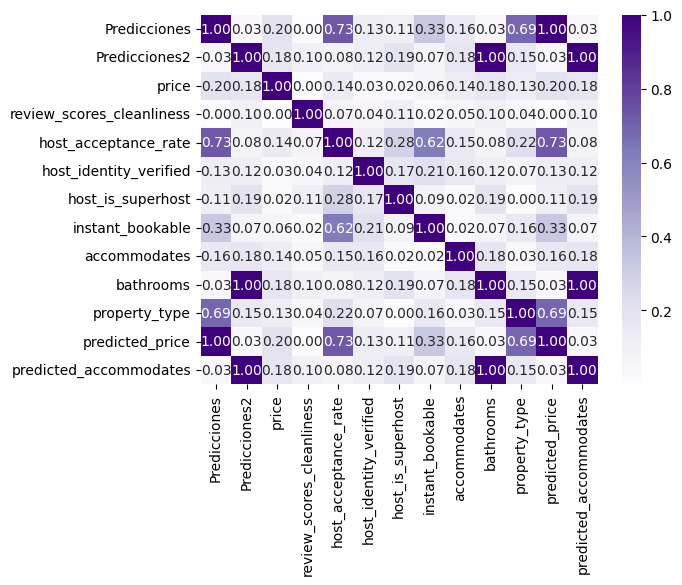

In [98]:
Heart_Nap = sns.heatmap(Corr_Factors10, cmap= 'Purples', annot=True, fmt=".2f")
Heart_Nap

In [99]:
Corr_Factors11 = df1.corr()
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,-0.032416,0.196241,-0.000685,0.727333,0.130507,-0.109842,0.325432,0.160257,-0.032416,0.685707,1.000000,-0.032416
Predicciones2,-0.032416,1.000000,-0.180571,-0.100537,-0.078022,0.118462,-0.190698,-0.066476,0.182734,1.000000,-0.152906,-0.032416,1.000000
price,0.196241,-0.180571,1.000000,-0.000134,0.142733,0.025611,-0.021556,0.063863,0.140445,-0.180571,0.134564,0.196241,-0.180571
review_scores_cleanliness,-0.000685,-0.100537,-0.000134,1.000000,0.073447,-0.044937,0.113818,0.022199,-0.050174,-0.100537,0.040583,-0.000685,-0.100537
host_acceptance_rate,0.727333,-0.078022,0.142733,0.073447,1.000000,-0.121544,0.282385,0.622569,0.154659,-0.078022,0.216756,0.727333,-0.078022
host_identity_verified,0.130507,0.118462,0.025611,-0.044937,-0.121544,1.000000,0.169966,-0.208563,0.155516,0.118462,0.072999,0.130507,0.118462
host_is_superhost,-0.109842,-0.190698,-0.021556,0.113818,0.282385,0.169966,1.000000,0.085433,-0.021609,-0.190698,0.004376,-0.109842,-0.190698
instant_bookable,0.325432,-0.066476,0.063863,0.022199,0.622569,-0.208563,0.085433,1.000000,0.019495,-0.066476,0.158948,0.325432,-0.066476
accommodates,0.160257,0.182734,0.140445,-0.050174,0.154659,0.155516,-0.021609,0.019495,1.000000,0.182734,-0.033699,0.160257,0.182734
bathrooms,-0.032416,1.000000,-0.180571,-0.100537,-0.078022,0.118462,-0.190698,-0.066476,0.182734,1.000000,-0.152906,-0.032416,1.000000


In [100]:
Corr_Factors11= abs(Corr_Factors9)
Corr_Factors11

,Predicciones,Predicciones2,price,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type,predicted_price,predicted_accommodates
Predicciones,1.000000,0.032416,0.196241,0.000685,0.727333,0.130507,0.109842,0.325432,0.160257,0.032416,0.685707,1.000000,0.032416
Predicciones2,0.032416,1.000000,0.180571,0.100537,0.078022,0.118462,0.190698,0.066476,0.182734,1.000000,0.152906,0.032416,1.000000
price,0.196241,0.180571,1.000000,0.000134,0.142733,0.025611,0.021556,0.063863,0.140445,0.180571,0.134564,0.196241,0.180571
review_scores_cleanliness,0.000685,0.100537,0.000134,1.000000,0.073447,0.044937,0.113818,0.022199,0.050174,0.100537,0.040583,0.000685,0.100537
host_acceptance_rate,0.727333,0.078022,0.142733,0.073447,1.000000,0.121544,0.282385,0.622569,0.154659,0.078022,0.216756,0.727333,0.078022
host_identity_verified,0.130507,0.118462,0.025611,0.044937,0.121544,1.000000,0.169966,0.208563,0.155516,0.118462,0.072999,0.130507,0.118462
host_is_superhost,0.109842,0.190698,0.021556,0.113818,0.282385,0.169966,1.000000,0.085433,0.021609,0.190698,0.004376,0.109842,0.190698
instant_bookable,0.325432,0.066476,0.063863,0.022199,0.622569,0.208563,0.085433,1.000000,0.019495,0.066476,0.158948,0.325432,0.066476
accommodates,0.160257,0.182734,0.140445,0.050174,0.154659,0.155516,0.021609,0.019495,1.000000,0.182734,0.033699,0.160257,0.182734
bathrooms,0.032416,1.000000,0.180571,0.100537,0.078022,0.118462,0.190698,0.066476,0.182734,1.000000,0.152906,0.032416,1.000000


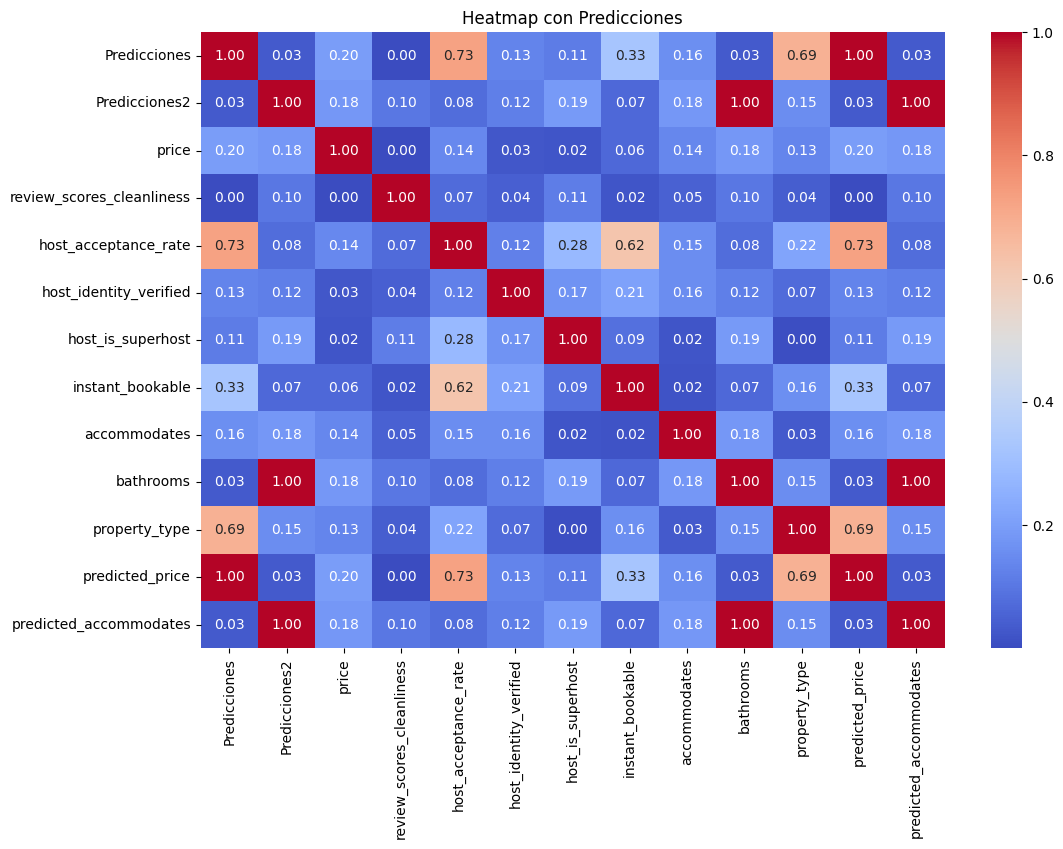

In [101]:
plt.figure(figsize=(12,8))
sns.heatmap(Corr_Factors11, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()